#**Vietnamese Speech Recognition with Wav2Vec**
Nhận diện giọng nói tiếng Việt với Wav2Vec

BÀI TẬP LỚN MÔN HỌC MÁY

---

**Họ và tên SV 1:** Nguyễn Viết Tuấn

**MSSV SV 1:** 22001363

---

**Họ và tên SV 2:** Nguyễn Minh Hiếu

**MSSV SV 2:** 22001321

---

**Họ và tên SV 3:** Nguyễn Tiến Đồng

**MSSV SV 3:** 22001314

---

**Họ và tên SV 4:** Vũ Trung Kiên

**MSSV SV 4:** 22001325

---

## **Cài đặt thư viện**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U datasets jiwer torchaudio evaluate transformers==4.39.3 accelerate==0.28.0

In [ ]:
#!pip install accelerate==0.25.0
from transformers import Trainer
#print("Trainer OK")
#!pip show transformers accelerate
#!pip uninstall -y peft
#!pip uninstall -y accelerate

## **Chuẩn bị dữ liệu**

In [ ]:
from datasets import load_dataset, Audio
from evaluate import load as load_metric

In [ ]:
# Lấy dữ liệu common_voice tiếng Việt
ds_train = load_dataset("mozilla-foundation/common_voice_11_0",
                        "vi", split="train+test")
ds_test = load_dataset("mozilla-foundation/common_voice_11_0",
                       "vi", split="validation")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/14.4k [00:00<?, ?B/s]

common_voice_11_0.py:   0%|          | 0.00/8.13k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/60.9k [00:00<?, ?B/s]

The repository for mozilla-foundation/common_voice_11_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_11_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


n_shards.json:   0%|          | 0.00/12.2k [00:00<?, ?B/s]

audio/vi/train/vi_train_0.tar:   0%|          | 0.00/76.3M [00:00<?, ?B/s]

audio/vi/dev/vi_dev_0.tar:   0%|          | 0.00/5.54M [00:00<?, ?B/s]

audio/vi/test/vi_test_0.tar:   0%|          | 0.00/33.9M [00:00<?, ?B/s]

audio/vi/other/vi_other_0.tar:   0%|          | 0.00/274M [00:00<?, ?B/s]

audio/vi/invalidated/vi_invalidated_0.ta(…):   0%|          | 0.00/10.4M [00:00<?, ?B/s]

transcript/vi/train.tsv:   0%|          | 0.00/562k [00:00<?, ?B/s]

transcript/vi/dev.tsv:   0%|          | 0.00/53.3k [00:00<?, ?B/s]

transcript/vi/test.tsv:   0%|          | 0.00/272k [00:00<?, ?B/s]

transcript/vi/other.tsv:   0%|          | 0.00/2.52M [00:00<?, ?B/s]

transcript/vi/invalidated.tsv:   0%|          | 0.00/74.7k [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]


Reading metadata...: 2525it [00:00, 97760.75it/s]


Generating validation split: 0 examples [00:00, ? examples/s]


Reading metadata...: 248it [00:00, 87234.77it/s]


Generating test split: 0 examples [00:00, ? examples/s]


Reading metadata...: 1237it [00:00, 82290.82it/s]


Generating other split: 0 examples [00:00, ? examples/s]


Reading metadata...: 11476it [00:00, 137523.27it/s]


Generating invalidated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 337it [00:00, 70088.78it/s]


In [ ]:
import IPython.display as ipd
import numpy as np
import random
from datasets import ClassLabel
import pandas as pd
from IPython.display import display, HTML

In [ ]:
ds_test[2]

{'client_id': 'c29d07b14c1806169f49b175b3bc29a620bd2d4c2291a4f8ecbe7dfbaf53fb40f990ebe6617dd1c281d09718ffab9a69d2fb615d19ba084288ba13d134253426',
 'path': '/root/.cache/huggingface/datasets/downloads/extracted/a640e63d958e098c32e0085a74d2b3625ca7c853c94cdbdad5f6fbbe7838043b/vi_dev_0/common_voice_vi_25222863.mp3',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/a640e63d958e098c32e0085a74d2b3625ca7c853c94cdbdad5f6fbbe7838043b/vi_dev_0/common_voice_vi_25222863.mp3',
  'array': array([0., 0., 0., ..., 0., 0., 0.]),
  'sampling_rate': 48000},
 'sentence': 'Apheng lấy quạt tay choàng nó, nó liền hỏi',
 'up_votes': 2,
 'down_votes': 0,
 'age': '',
 'gender': '',
 'accent': '',
 'locale': 'vi',
 'segment': ''}

In [ ]:
#pip install evaluate

In [ ]:
print(ds_train)
print(ds_test)

Dataset({
    features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
    num_rows: 3762
})
Dataset({
    features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
    num_rows: 248
})


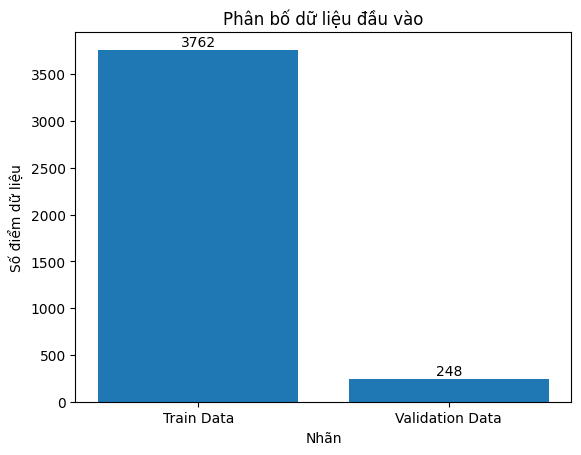

In [ ]:
import matplotlib.pyplot as plt

data = [ds_train.num_rows, ds_test.num_rows]
labels = ['Train Data', 'Validation Data']

plt.bar(labels, data)
for index, value in enumerate(data):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.xlabel('Nhãn')
plt.ylabel('Số điểm dữ liệu')
plt.title('Phân bố dữ liệu đầu vào')
plt.show()

## **Xử lý dữ liệu**

In [ ]:
# Xoá tất cả cột không cần thiết, chỉ giữ lại "sentence", "path", "audio"
ds_train = ds_train.remove_columns(["accent", "age", "client_id", "down_votes", "gender", "locale", "segment", "up_votes"])
ds_test = ds_test.remove_columns(["accent", "age", "client_id", "down_votes", "gender", "locale", "segment", "up_votes"])

In [ ]:
# Lấy ngẫu nhiên N điểm dữ liệu trong datasets
def show_random_elements(dataset, num_examples=10):
    assert num_examples <= len(dataset), "Không thể lấy nhiều hơn độ dài dataset"
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)

    df = pd.DataFrame(dataset[picks])
    display(HTML(df.to_html()))

In [ ]:
show_random_elements(ds_train.remove_columns(["path", "audio"]), num_examples=5)

,sentence
0,thứ lăng nhăng
1,Tất cả đối với tôi đều rất đẹp
2,Có vòng ánh sáng hiện lên trông đẹp làm sao
3,Lối đi nào cũng có mặt cả đôi
4,Ai nói gì đâu Em không có nghe


In [ ]:
# Xoá dấu và các ký tự đặc biệt
import re
chars_to_ignore_regex = '[\,\?\.\!\-\;\:\"\“\%\‘\”\�]'

def remove_special_characters(batch):
    batch["sentence"] = re.sub(chars_to_ignore_regex,
                               '', batch["sentence"]).lower() + " "
    return batch

In [ ]:
ds_train = ds_train.map(remove_special_characters)
ds_test = ds_test.map(remove_special_characters)

Map:   0%|          | 0/3762 [00:00<?, ? examples/s]

Map:   0%|          | 0/248 [00:00<?, ? examples/s]

In [ ]:
show_random_elements(ds_train.remove_columns(["path","audio"]))

,sentence
0,ai vậy
1,hà liền tiếp tục nói
2,để tìm được ông thầy đó
3,mặt khác chị cũng rất tò mò không biết được rằng
4,nhân đôi niềm cô đơn
5,nên gia đình làm lễ giải trừ
6,mẹ im lặng không nói gì
7,lòng sao vương vấn
8,nâng từng chiếc túi lên
9,ừ thì tao cũng tính như vậy nhưng mà nãy có người gọi


In [ ]:
# Chuyển Audio về rate 16000
ds_train = ds_train.cast_column("audio", Audio(sampling_rate=16_000))
ds_test = ds_test.cast_column("audio", Audio(sampling_rate=16_000))

In [ ]:
# Lấy mẫu một điểm dữ liệu
rand_int = random.randint(0, len(ds_train)-1)

print(ds_train[rand_int]["sentence"])
ipd.Audio(data=ds_train[rand_int]["audio"]["array"], autoplay=False, rate=16000)

giờ nghe hỏi mới quay lại từ tốn nói 


In [ ]:
print("Target text:", ds_train[rand_int]["sentence"])
print("Input array shape:", ds_train[rand_int]["audio"]["array"].shape)
print("Sampling rate:", ds_train[rand_int]["audio"]["sampling_rate"])

Target text: giờ nghe hỏi mới quay lại từ tốn nói 
Input array shape: (82176,)
Sampling rate: 16000


## **Tạo bộ tokenizer**

In [ ]:
# Lấy ra tất cả ký tự có thể tìm được trong dataset
def extract_all_chars(batch):
  all_text = " ".join(batch["sentence"])
  vocab = list(set(all_text))
  return {"vocab": [vocab], "all_text": [all_text]}

In [ ]:
# Map hàm trên lên dataset
vocab_train = ds_train.map(
  extract_all_chars, batched=True,
  batch_size=-1, keep_in_memory=True,
  remove_columns=ds_train.column_names
)
vocab_test = ds_test.map(
  extract_all_chars, batched=True,
  batch_size=-1, keep_in_memory=True,
  remove_columns=ds_test.column_names
)

Map:   0%|          | 0/3762 [00:00<?, ? examples/s]

Map:   0%|          | 0/248 [00:00<?, ? examples/s]

In [ ]:
# Lấy danh sách ký tự trên tập train và test
vocab_list = list(set(vocab_train["vocab"][0]) | set(vocab_test["vocab"][0]))

In [ ]:
# Xem danh sách ký tự lấy được
vocab_dict = {v: k for k, v in enumerate(vocab_list)}
vocab_dict

{'í': 0,
 'ụ': 1,
 'ỹ': 2,
 'ọ': 3,
 'à': 4,
 'ộ': 5,
 'ơ': 6,
 'q': 7,
 'ù': 8,
 'ò': 9,
 'ỷ': 10,
 'ở': 11,
 'y': 12,
 'b': 13,
 'ệ': 14,
 'ị': 15,
 "'": 16,
 'ằ': 17,
 'i': 18,
 'ả': 19,
 'o': 20,
 'ẩ': 21,
 'ỏ': 22,
 'ỗ': 23,
 'ẵ': 24,
 'a': 25,
 'c': 26,
 'ê': 27,
 'ý': 28,
 'ữ': 29,
 'f': 30,
 'ử': 31,
 'r': 32,
 'u': 33,
 'ô': 34,
 'á': 35,
 'ự': 36,
 'ớ': 37,
 'ă': 38,
 'ỉ': 39,
 'ậ': 40,
 'h': 41,
 'ổ': 42,
 't': 43,
 'ẻ': 44,
 'v': 45,
 'ỵ': 46,
 'ầ': 47,
 'm': 48,
 'ồ': 49,
 'ỳ': 50,
 'ẹ': 51,
 'đ': 52,
 'd': 53,
 'ắ': 54,
 'ấ': 55,
 ' ': 56,
 'ứ': 57,
 'ó': 58,
 'ẽ': 59,
 'ặ': 60,
 'ể': 61,
 'z': 62,
 'n': 63,
 'ế': 64,
 'ạ': 65,
 'ợ': 66,
 'é': 67,
 'ũ': 68,
 'ì': 69,
 'ố': 70,
 'e': 71,
 'ề': 72,
 'g': 73,
 'w': 74,
 'ã': 75,
 'l': 76,
 'k': 77,
 's': 78,
 'ỡ': 79,
 'õ': 80,
 'ễ': 81,
 'ẫ': 82,
 'ủ': 83,
 'ẳ': 84,
 'â': 85,
 'p': 86,
 'ú': 87,
 'ừ': 88,
 'j': 89,
 'ờ': 90,
 'ĩ': 91,
 'è': 92,
 'x': 93,
 'ư': 94}

In [ ]:
# Thay thế khoảng cách bằng dấu phân cách
vocab_dict["|"] = vocab_dict[" "]
del vocab_dict[" "]

In [ ]:
# Thêm [UNK] cho từ không xác định
vocab_dict["[UNK]"] = len(vocab_dict)
# Thêm [PAD] để padding cho cùng chiều dài input
vocab_dict["[PAD]"] = len(vocab_dict)
# In chiều dài từ điển
len(vocab_dict)

97

In [ ]:
# Lưu từ điển thành file json
import json
with open('vocab.json', 'w') as vocab_file:
    json.dump(vocab_dict, vocab_file)

In [ ]:
# Login HF để có lưu lại model và tokenizer
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# Tên model để load từ HuggingFace
# Model gốc
model_wav2vec2 = "facebook/wav2vec2-large-xlsr-53"
# Đặt tên model mới để finetuning từ model gốc cho Tiếng Việt
model_checkpoint = "Tuan457/vietnamese_tts_hus"

In [ ]:
from transformers import AutoConfig
# Load file config.json từ model gốc
config = AutoConfig.from_pretrained(model_wav2vec2)

tokenizer_type = config.model_type if config.tokenizer_class is None else None
config = config if config.tokenizer_class is not None else None

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

In [ ]:
# Tạo bộ tokenizer từ vocab.json
from transformers import Wav2Vec2CTCTokenizer
tokenizer = Wav2Vec2CTCTokenizer.from_pretrained(
  "./",
  config=config,
  tokenizer_type=tokenizer_type,
  unk_token="[UNK]",
  pad_token="[PAD]",
  word_delimiter_token="|",
)
# Lưu lại tokenizer Tiếng Việt (làm 1 lần duy nhất)
# tokenizer.push_to_hub(model_checkpoint)

In [ ]:
from transformers import Wav2Vec2CTCTokenizer
# Load tokenizer từ hub đã lưu ở trên
tokenizer = Wav2Vec2CTCTokenizer.from_pretrained(
  model_checkpoint,
  config=config,
  tokenizer_type=tokenizer_type,
  unk_token="[UNK]",
  pad_token="[PAD]",
  word_delimiter_token="|",
)

tokenizer_config.json:   0%|          | 0.00/404 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/30.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/406 [00:00<?, ?B/s]

In [ ]:
tokenizer

Wav2Vec2CTCTokenizer(name_or_path='Tuan457/vietnamese_tts_hus', vocab_size=97, model_max_length=1000000000000000019884624838656, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '<s>', 'unk_token': '[UNK]', 'pad_token': '[PAD]', 'additional_special_tokens': ['<s>', '</s>']}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	95: AddedToken("[UNK]", rstrip=True, lstrip=True, single_word=False, normalized=False, special=False),
	96: AddedToken("[PAD]", rstrip=True, lstrip=True, single_word=False, normalized=False, special=False),
	97: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	98: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}

In [ ]:
# Load Extractor
from transformers import Wav2Vec2FeatureExtractor
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_wav2vec2)

preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

In [ ]:
feature_extractor

Wav2Vec2FeatureExtractor {
  "do_normalize": true,
  "feature_extractor_type": "Wav2Vec2FeatureExtractor",
  "feature_size": 1,
  "padding_side": "right",
  "padding_value": 0,
  "return_attention_mask": true,
  "sampling_rate": 16000
}

In [ ]:
# Load Wav2Vec2Processor
from transformers import Wav2Vec2Processor
processor = Wav2Vec2Processor(feature_extractor=feature_extractor, tokenizer=tokenizer)

In [ ]:
# Hàm map processor lên audio và nhãn của từng điểm dữ liệu trên tập
from datasets import Audio

def prepare_dataset(batch):
    # Dữ liệu audio đã được decode sẵn thành mảng numpy
    audio = batch["audio"]

    batch["input_values"] = processor(audio["array"],
                                      sampling_rate=audio["sampling_rate"]).input_values[0]
    batch["input_length"] = len(batch["input_values"])

    with processor.as_target_processor():
        batch["labels"] = processor(batch["sentence"]).input_ids

    return batch


In [ ]:
print(ds_train.column_names)
print(ds_train[0])

['path', 'audio', 'sentence']
{'path': '/root/.cache/huggingface/datasets/downloads/extracted/4d41f2253e68c139539b36607b20d6a01fe3cfb04b38792003f61c379c9d07d1/vi_train_0/common_voice_vi_23901117.mp3', 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/4d41f2253e68c139539b36607b20d6a01fe3cfb04b38792003f61c379c9d07d1/vi_train_0/common_voice_vi_23901117.mp3', 'array': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
       -1.79643739e-05, -1.54107620e-05,  3.32880700e-06]), 'sampling_rate': 16000}, 'sentence': 'quả nhiên trúng tuyển vào trường quốc lập '}


In [ ]:
ds_train = ds_train.map(prepare_dataset, remove_columns=ds_train.column_names)
ds_test = ds_test.map(prepare_dataset, remove_columns=ds_test.column_names)

Map:   0%|          | 0/3762 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:156: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/248 [00:00<?, ? examples/s]

In [ ]:
# Đặt độ dài tối đa đầu vào là 15s
max_input_length_in_sec = 15.0
ds_train = ds_train.filter(lambda x: x < max_input_length_in_sec * processor.feature_extractor.sampling_rate,
                           input_columns=["input_length"])
ds_test = ds_test.filter(lambda x: x < max_input_length_in_sec * processor.feature_extractor.sampling_rate,
                          input_columns=["input_length"])

Filter:   0%|          | 0/3762 [00:00<?, ? examples/s]

Filter:   0%|          | 0/248 [00:00<?, ? examples/s]

In [ ]:
import torch

from dataclasses import dataclass, field
from typing import Any, Dict, List, Optional, Union

@dataclass
class DataCollatorCTCWithPadding:
    """
    Bộ đối chiếu dữ liệu (DataCollator) sẽ tự động pad các đầu vào nhận được.
    Args:
        processor (:class:`~transformers.Wav2Vec2Processor`)
            The processor used for proccessing the data.
        padding (:obj:`bool`, :obj:`str` or :class:`~transformers.tokenization_utils_base.PaddingStrategy`, `optional`, defaults to :obj:`True`):
            Select a strategy to pad the returned sequences (according to the model's padding side and padding index)
            among:
            * :obj:`True` or :obj:`'longest'`: Pad to the longest sequence in the batch (or no padding if only a single
              sequence if provided).
            * :obj:`'max_length'`: Pad to a maximum length specified with the argument :obj:`max_length` or to the
              maximum acceptable input length for the model if that argument is not provided.
            * :obj:`False` or :obj:`'do_not_pad'` (default): No padding (i.e., can output a batch with sequences of
              different lengths).
        max_length (:obj:`int`, `optional`):
            Maximum length of the ``input_values`` of the returned list and optionally padding length (see above).
        max_length_labels (:obj:`int`, `optional`):
            Maximum length of the ``labels`` returned list and optionally padding length (see above).
        pad_to_multiple_of (:obj:`int`, `optional`):
            If set will pad the sequence to a multiple of the provided value.
            This is especially useful to enable the use of Tensor Cores on NVIDIA hardware with compute capability >=
            7.5 (Volta).
    """

    processor: Wav2Vec2Processor
    padding: Union[bool, str] = True
    max_length: Optional[int] = None
    max_length_labels: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None
    pad_to_multiple_of_labels: Optional[int] = None

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        # split inputs and labels since they have to be of different lenghts and need
        # different padding methods
        input_features = [{"input_values": feature["input_values"]} for feature in features]
        label_features = [{"input_ids": feature["labels"]} for feature in features]

        batch = self.processor.pad(
            input_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        with self.processor.as_target_processor():
            labels_batch = self.processor.pad(
                label_features,
                padding=self.padding,
                max_length=self.max_length_labels,
                pad_to_multiple_of=self.pad_to_multiple_of_labels,
                return_tensors="pt",
            )

        # thay thế phần pad bằng -100 để bỏ qua loss một cách chính xác
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)

        batch["labels"] = labels

        return batch

In [ ]:
# Trình đối chiếu dữ liệu DataCollatorCTCWithPadding
data_collator = DataCollatorCTCWithPadding(processor=processor, padding=True)

#**Tạo hàm tính độ đo WER**

In [ ]:
# Load hàm tính toán chỉ số wer
wer_metric = load_metric("wer")

In [ ]:
# Hàm tính chỉ số wer trên tập validation
def compute_metrics(pred):
    pred_logits = pred.predictions
    pred_ids = np.argmax(pred_logits, axis=-1)

    pred.label_ids[pred.label_ids == -100] = processor.tokenizer.pad_token_id

    pred_str = processor.batch_decode(pred_ids)
    # Không nhóm các tokens (group_tokens) khi tính metrics
    label_str = processor.batch_decode(pred.label_ids, group_tokens=False)

    wer = wer_metric.compute(predictions=pred_str, references=label_str)

    return {"wer": wer}

# **Load mô hình**

In [ ]:
from transformers import AutoModelForCTC
# Tải model wav2vec2 gốc
model = AutoModelForCTC.from_pretrained(
    model_wav2vec2,
    attention_dropout=0.1,
    hidden_dropout=0.1,
    feat_proj_dropout=0.0,
    mask_time_prob=0.05,
    layerdrop=0.1,
    ctc_loss_reduction="mean",
    pad_token_id=processor.tokenizer.pad_token_id,
    vocab_size=len(processor.tokenizer)
).to("cuda")

pytorch_model.bin:   0%|          | 0.00/1.27G [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-xlsr-53 and are newly initialized: ['lm_head.bias', 'lm_head.weight', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Đóng băng lớp trích xuất đặc trưng để không training lớp này
if hasattr(model, "freeze_feature_extractor"):
  model.freeze_feature_extractor()

/usr/local/lib/python3.11/dist-packages/transformers/models/wav2vec2/modeling_wav2vec2.py:1920: FutureWarning: The method `freeze_feature_extractor` is deprecated and will be removed in Transformers v5. Please use the equivalent `freeze_feature_encoder` method instead.
  warnings.warn(


In [ ]:
#pip install --upgrade transformers
#import transformers
#print(transformers.__version__)


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="wav2vec_vietnamese",
  group_by_length=True,
  per_device_train_batch_size=30,
  gradient_accumulation_steps=2,
  evaluation_strategy="steps",
  num_train_epochs=7,
  gradient_checkpointing=True,
  save_steps=50,
  eval_steps=50,
  logging_steps=50,
  learning_rate=3e-4,
  save_total_limit=2,
)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    data_collator=data_collator,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=ds_train,
    eval_dataset=ds_test,
    tokenizer=processor.feature_extractor,
)

/usr/local/lib/python3.11/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


# **Training đợt 1**

In [ ]:
trainer.train()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: tuantb906 (tuantb906-hanoi-university-of-science) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.11/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:156: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Step,Training Loss,Validation Loss,Wer
50,7.683600,3.479072,1.000000
100,3.475400,3.438518,1.000000
150,3.456700,3.439837,1.000000
200,3.448600,3.426676,1.000000
250,3.444200,3.451800,1.000000
300,3.420900,3.360232,1.000000
350,3.358700,3.351466,1.000000
400,3.334600,3.322449,1.000000


/usr/local/lib/python3.11/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:156: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:156: UserWarning: `as_target_processor` is deprecated and will be rem

TrainOutput(global_step=441, training_loss=3.894249567909846, metrics={'train_runtime': 6064.0288, 'train_samples_per_second': 4.343, 'train_steps_per_second': 0.073, 'total_flos': 3.549038450546166e+18, 'train_loss': 3.894249567909846, 'epoch': 7.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 3.304375648498535,
 'eval_wer': 1.0,
 'eval_runtime': 23.5212,
 'eval_samples_per_second': 10.544,
 'eval_steps_per_second': 1.318,
 'epoch': 7.0}

<function matplotlib.pyplot.show(close=None, block=None)>

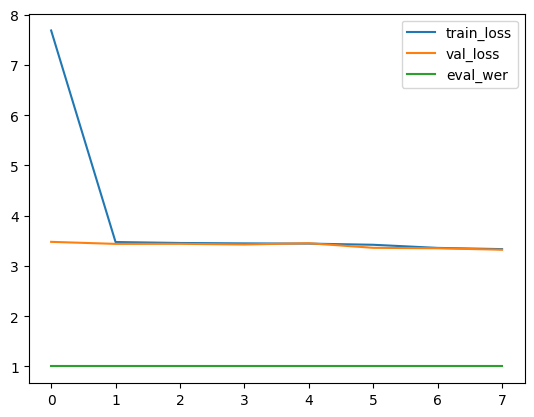

In [ ]:
# Plot biểu đồ đường loss của training và validation
training_loss,validation_loss=[],[]
validation_wer=[]
t = 0
for i in trainer.state.log_history[:-2]:
   if t == 0:
     training_loss.append(i["loss"])
     t=1
   else:
     validation_loss.append(i["eval_loss"])
     validation_wer.append(i["eval_wer"])
     t=0
from matplotlib import pyplot as plt
plt.plot(training_loss, label='train_loss')
plt.plot(validation_loss,label='val_loss')
plt.plot(validation_wer,label='eval_wer')
plt.legend()
plt.show

In [ ]:
repo_name = "Tuan457/vietnamese_tts_hus"
model.push_to_hub(repo_name)

README.md:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

Uploading...:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Tuan457/vietnamese_tts_hus/commit/3d9c226382fd4cd79a430239f34093034190e060', commit_message='Upload Wav2Vec2ForCTC', commit_description='', oid='3d9c226382fd4cd79a430239f34093034190e060', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Tuan457/vietnamese_tts_hus', endpoint='https://huggingface.co', repo_type='model', repo_id='Tuan457/vietnamese_tts_hus'), pr_revision=None, pr_num=None)

# **Training đợt 2**

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss,Wer
50,3.356600,3.339768,1.000000
100,3.330600,3.268936,1.000000
150,3.080500,2.672462,1.065824
200,2.271200,1.610082,1.046340
250,1.437300,1.111935,0.865719
300,0.997800,0.906699,0.776198
350,0.793900,0.828051,0.705635
400,0.682600,0.742553,0.672986


/usr/local/lib/python3.11/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:156: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:156: UserWarning: `as_target_processor` is deprecated and will be rem

TrainOutput(global_step=441, training_loss=1.8685480969833408, metrics={'train_runtime': 6114.0193, 'train_samples_per_second': 4.307, 'train_steps_per_second': 0.072, 'total_flos': 3.548867456790174e+18, 'train_loss': 1.8685480969833408, 'epoch': 7.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.7356024384498596,
 'eval_wer': 0.660347551342812,
 'eval_runtime': 23.1942,
 'eval_samples_per_second': 10.692,
 'eval_steps_per_second': 1.337,
 'epoch': 7.0}

<function matplotlib.pyplot.show(close=None, block=None)>

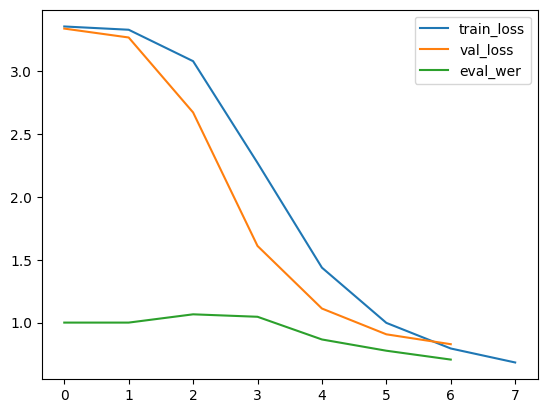

In [ ]:
# Plot biểu đồ đường loss của training và validation
training_loss,validation_loss=[],[]
validation_wer=[]
t = 0
for i in trainer.state.log_history[:-3]:
   if t == 0:
     training_loss.append(i["loss"])
     t=1
   else:
     validation_loss.append(i["eval_loss"])
     validation_wer.append(i["eval_wer"])
     t=0
from matplotlib import pyplot as plt
plt.plot(training_loss, label='train_loss')
plt.plot(validation_loss,label='val_loss')
plt.plot(validation_wer,label='eval_wer')
plt.legend()
plt.show

In [ ]:
repo_name = "Tuan457/vietnamese_tts_hus"
model.push_to_hub(repo_name)

Uploading...:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Tuan457/vietnamese_tts_hus/commit/df713bf88cb32432e0454cd5ecdba6661e89a8b3', commit_message='Upload Wav2Vec2ForCTC', commit_description='', oid='df713bf88cb32432e0454cd5ecdba6661e89a8b3', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Tuan457/vietnamese_tts_hus', endpoint='https://huggingface.co', repo_type='model', repo_id='Tuan457/vietnamese_tts_hus'), pr_revision=None, pr_num=None)

# **Training đợt 3**

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss,Wer
50,0.644300,0.705697,0.660874
100,0.570700,0.668076,0.618220
150,0.478600,0.590022,0.560295
200,0.447000,0.619163,0.585571
250,0.399800,0.576149,0.552396
300,0.334500,0.556340,0.526593
350,0.320600,0.520176,0.507109
400,0.299100,0.528504,0.511322


/usr/local/lib/python3.11/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:156: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:838: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:156: UserWarning: `as_target_processor` is deprecated and will be rem

TrainOutput(global_step=441, training_loss=0.42238134916136866, metrics={'train_runtime': 6171.3681, 'train_samples_per_second': 4.267, 'train_steps_per_second': 0.071, 'total_flos': 3.5530242533165435e+18, 'train_loss': 0.42238134916136866, 'epoch': 7.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.5095958113670349,
 'eval_wer': 0.5002632964718273,
 'eval_runtime': 23.4619,
 'eval_samples_per_second': 10.57,
 'eval_steps_per_second': 1.321,
 'epoch': 7.0}

In [ ]:
repo_name = "Tuan457/vietnamese_tts_hus"
model.push_to_hub(repo_name)

Uploading...:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Tuan457/vietnamese_tts_hus/commit/dbb332b45fcaadf97547a2d4c627936670aa6b59', commit_message='Upload Wav2Vec2ForCTC', commit_description='', oid='dbb332b45fcaadf97547a2d4c627936670aa6b59', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Tuan457/vietnamese_tts_hus', endpoint='https://huggingface.co', repo_type='model', repo_id='Tuan457/vietnamese_tts_hus'), pr_revision=None, pr_num=None)

<function matplotlib.pyplot.show(close=None, block=None)>

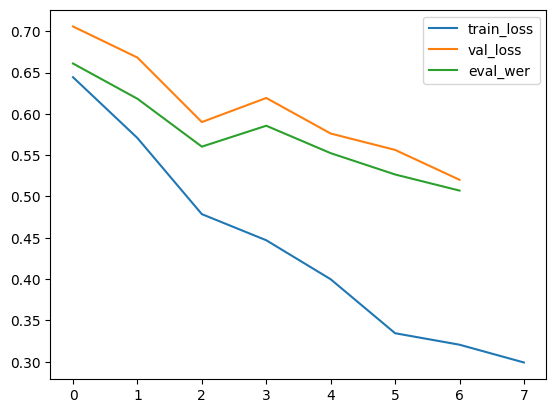

In [ ]:
# Plot biểu đồ đường loss của training và validation
training_loss,validation_loss=[],[]
validation_wer=[]
t = 0
for i in trainer.state.log_history[:-3]:
   if t == 0:
     training_loss.append(i["loss"])
     t=1
   else:
     validation_loss.append(i["eval_loss"])
     validation_wer.append(i["eval_wer"])
     t=0
from matplotlib import pyplot as plt
plt.plot(training_loss, label='train_loss')
plt.plot(validation_loss,label='val_loss')
plt.plot(validation_wer,label='eval_wer')
plt.legend()
plt.show

# **Testing - Kiểm thử**

In [ ]:
# Chọn một audio ngẫu nhiên để test thử
import IPython.display as ipd
import numpy as np
import random
audio_num = random.randint(0, ds_test.num_rows)
ipd.Audio(data=ds_test[audio_num]["input_values"], autoplay=False, rate=16000)

In [ ]:
# Kết quả dự đoán
from transformers import AutoModelForCTC

inputs = processor(ds_test[audio_num]["input_values"], sampling_rate=16000, return_tensors="pt")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
inputs = inputs.to(device)
with torch.no_grad():
    logits = model(**inputs).logits
    # Ket qua du doan
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)
    print("Result: ",transcription)

Result:  ['chinh mừng rớ mở gia rồi đọc']


# **So sánh với model SOTA**

In [ ]:
# Dự đoán trên tập test vi common_voice_8_0
# để so sánh với paper
import torch
import torchaudio
from datasets import load_dataset, Audio
from evaluate import load as load_metric
from transformers import Wav2Vec2FeatureExtractor
import re
test_dataset = load_dataset("mozilla-foundation/common_voice_11_0", "vi", split="test")
test_dataset = test_dataset.cast_column("audio", Audio(sampling_rate=16_000))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
wer = load_metric("wer")
chars_to_ignore_regex = r'[,?.!\-;:"“%\'�]'

def speech_file_to_array_fn(batch):
  audio = batch["audio"]
  batch["target_text"] = re.sub(chars_to_ignore_regex, '', batch["sentence"]).lower()
  batch['speech'] = audio['array']
  return batch
test_dataset = test_dataset.map(speech_file_to_array_fn)

def evaluate(batch):
  inputs = processor(batch['speech'], sampling_rate=16000, return_tensors="pt",padding=True, do_normalize=False)
  inputs = inputs.to(device)
  with torch.no_grad():
      logits = model(**inputs).logits
      # Ket qua du doan
      predicted_ids = torch.argmax(logits, dim=-1)
      transcription = processor.batch_decode(predicted_ids)
      batch["pred_strings"] = transcription[0]

  return batch
result = test_dataset.map(evaluate)
print("WER: {:2f}".format(100 * wer.compute(predictions=result["pred_strings"], references=result["target_text"])))

Map:   0%|          | 0/1237 [00:00<?, ? examples/s]

WER: 17.527696
